<a href="https://colab.research.google.com/github/Meshva-p/sparks-foundation/blob/main/Stock_market_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TASK 4 - STOCK MARKET PREDICTION USING NUMERICAL AND TEXTUAL DATA**

Author -  Meshva Patel

Data Science and Business Analytics Intern

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame


start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2020, 1, 1)

df = web.DataReader("AAPL", 'yahoo', start, end)
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-24,71.222504,70.730003,71.172501,71.067497,48478800.0,70.580566
2019-12-26,72.495003,71.175003,71.205002,72.477501,93121200.0,71.980911
2019-12-27,73.492500,72.029999,72.779999,72.449997,146266000.0,71.953598
2019-12-30,73.172501,71.305000,72.364998,72.879997,144114400.0,72.380653
2019-12-31,73.419998,72.379997,72.482498,73.412498,100805600.0,72.909500


10 years data from January 2010 until January 2020.

Closing Price which remarks the final price in which the stocks are traded by the end of the day.

Adjusted close is the closing price after adjustments for all applicable splits and dividend distributions.

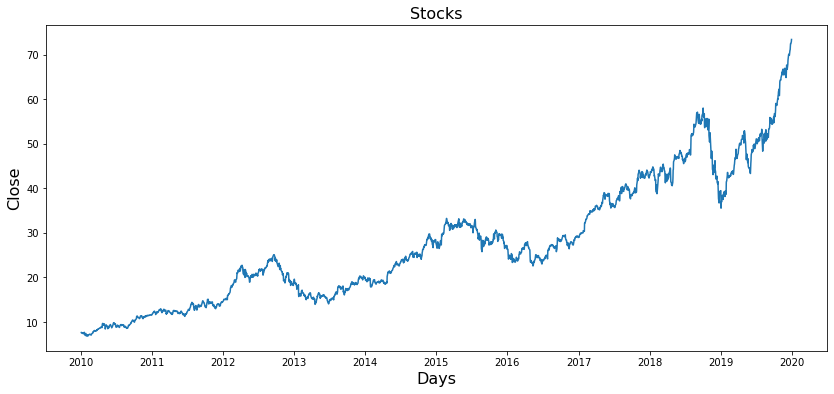

In [ ]:
plt.figure(figsize=(14,6))
plt.title('Stocks',fontsize=16)
plt.xlabel("Days",fontsize= 16)
plt.ylabel("Close", fontsize= 16)
plt.plot(df["Close"])
plt.show()

### **Rolling Mean (Moving Average) — to determine trends ** 

In [ ]:
close_p = df['Adj Close']
avg = close_p.rolling(window=100).mean()
avg.head(20)

Date
2010-01-04   NaN
2010-01-05   NaN
2010-01-06   NaN
2010-01-07   NaN
2010-01-08   NaN
2010-01-11   NaN
2010-01-12   NaN
2010-01-13   NaN
2010-01-14   NaN
2010-01-15   NaN
2010-01-19   NaN
2010-01-20   NaN
2010-01-21   NaN
2010-01-22   NaN
2010-01-25   NaN
2010-01-26   NaN
2010-01-27   NaN
2010-01-28   NaN
2010-01-29   NaN
2010-02-01   NaN
Name: Adj Close, dtype: float64

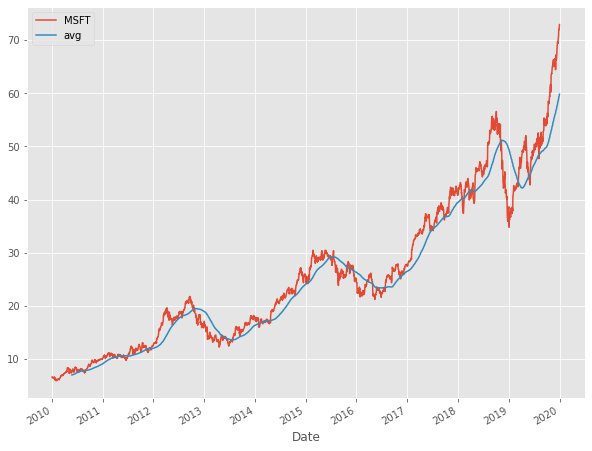

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(10, 8))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

close_p.plot(label='MSFT')
avg.plot(label='avg')
plt.legend()
plt.show()

Moving average is a calculation to analyze data points by creating a series of averages of different subsets of the full data set.This eliminates “noise” in our price chart.“Resistance” meaning from the downtrend and uptrend of stocks you could expect it will follow the trend and less likely to deviate outside its resistance point.

OBSERVATION : 

1.   The Moving Average makes the line smooth and showcase the increasing or decreasing trend of stocks price.




***Return Deviation - to determine risk and return***

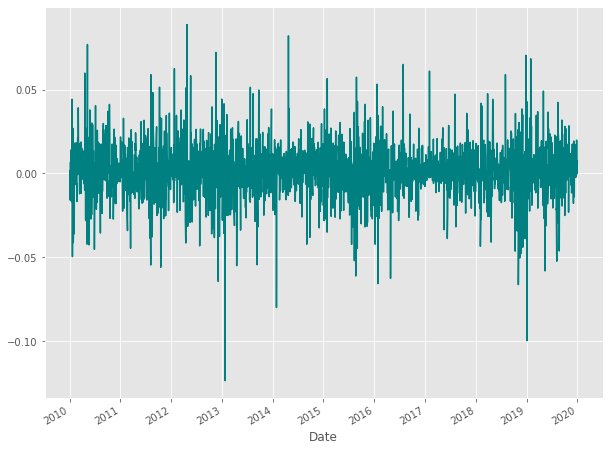

In [ ]:
ret = close_p / close_p.shift(1) - 1
ret.plot(label='return', color='teal')
plt.show()

Expected return and standard deviation are two statistical measures that can be used to analyze a portfolio

***Analysing your AAPL, IBM, GE, MSFT, GOOG Stocks***

In [ ]:
dfcomp = web.DataReader(['AAPL', 'IBM', 'GE', 'MSFT', 'GOOG'],'yahoo',start=start,end=end)['Adj Close']
dfcomp.head(10)

Symbols,AAPL,IBM,GE,MSFT,GOOG
Date,,,,,
2010-01-04,6.604801,93.500313,10.715343,24.168472,312.204773
2010-01-05,6.616219,92.370834,10.770829,24.176279,310.829926
2010-01-06,6.510980,91.770790,10.715343,24.027906,302.994293
2010-01-07,6.498945,91.453102,11.270185,23.778025,295.940735
2010-01-08,6.542150,92.370834,11.512927,23.942017,299.885956
2010-01-11,6.484439,91.403702,11.623892,23.637472,299.432648
2010-01-12,6.410679,92.130806,11.630828,23.481291,294.137512
2010-01-13,6.501104,91.933167,11.672442,23.699940,292.448822
2010-01-14,6.463451,93.401497,11.582279,24.176279,293.823669


***CORRELATION ANALYSIS ***

In [ ]:
comp = dfcomp.pct_change()
corr = comp.corr()
comp.head(10)

Symbols,AAPL,IBM,GE,MSFT,GOOG
Date,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.001729,-0.012080,0.005178,0.000323,-0.004404
2010-01-06,-0.015906,-0.006496,-0.005152,-0.006137,-0.025209
2010-01-07,-0.001848,-0.003462,0.051780,-0.010400,-0.023280
2010-01-08,0.006648,0.010035,0.021538,0.006897,0.013331
2010-01-11,-0.008821,-0.010470,0.009638,-0.012720,-0.001512
2010-01-12,-0.011375,0.007955,0.000597,-0.006607,-0.017684
2010-01-13,0.014105,-0.002145,0.003578,0.009312,-0.005741
2010-01-14,-0.005792,0.015972,-0.007724,0.020099,0.004701


We can analyse the competition by running the percentage change and correlation (HEATMAPS). Percentage change will find how much the price changes compared to the previous day which defines returns. Knowing the correlation will help us see whether the returns are affected by other stocks’ returns

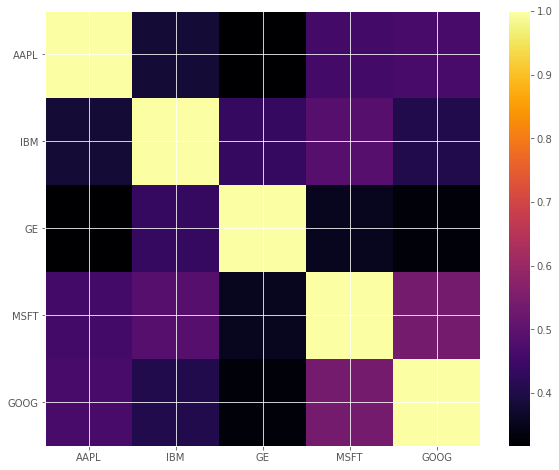

In [ ]:
plt.imshow(corr, cmap='inferno', interpolation='none')
plt.colorbar()

plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns);

OBSERVATION  : There's a great amount of correlation among the stocks , but these might be because of the rising trends in technology.

***Stocks Return Rate and Risk***

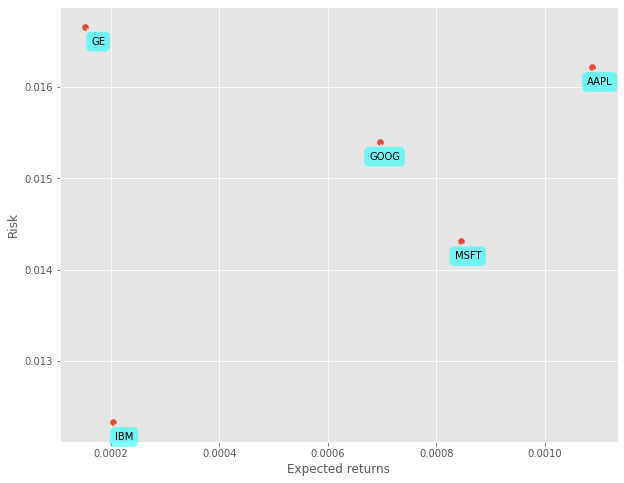

In [ ]:

plt.scatter(comp.mean(), comp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label, x, y in zip(comp.columns, comp.mean(), comp.std()):
    plt.annotate(label, xy = (x , y), xytext = (20 , -20), textcoords = 'offset points',
                 ha = 'right', va = 'bottom', bbox = dict(boxstyle = 'round, pad = 0.5', fc = 'cyan',
                 alpha = 0.5), arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3, rad = 0'))

## ***USING THE INDIA-NEWS-HEADLINE DATASET***

In [ ]:
df1 = pd.read_csv('/content/gdrive/My Drive/sample data/india-news-headlines.csv')

In [ ]:
df1.head(10)

,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa
5,20010102,unknown,Extra buses to clear tourist traffic
6,20010102,unknown,Dilute the power of transfers; says Riberio
7,20010102,unknown,Focus shifts to teaching of Hindi
8,20010102,unknown,IT will become compulsory in schools
9,20010102,unknown,Move to stop freedom fighters' pension flayed


In [ ]:

df1.tail(10)

,publish_date,headline_category,headline_text
3297162,20200630,city.kanpur,vehicle of up stf team bringing gangster vikas...
3297163,20200630,entertainment.hindi.bollywood,sushant singh rajputs demise fans trend cbifor...
3297164,20200630,entertainment.hindi.bollywood,amitabh bachchans grandson agastya nanda prepp...
3297165,20200630,home.education,icse isc result 2020 when where to check class...
3297166,20200630,city.lucknow,up govt imposes weekend restrictions from tonight
3297167,20200630,gadgets-news,why tiktok removed 1 65 crore videos in india
3297168,20200630,entertainment.hindi.bollywood,apurva asrani calls alia bhatts mother soni ra...
3297169,20200630,entertainment.hindi.bollywood,kangana ranaut gets a doll version of herself ...
3297170,20200630,entertainment.hindi.bollywood,meezaan jaffrey reminisces his childhood days ...
3297171,20200630,entertainment.telugu.movies.news,prabhas20 titled as radhe shyam prabhas and po...


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3297172 entries, 0 to 3297171
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   publish_date       int64 
 1   headline_category  object
 2   headline_text      object
dtypes: int64(1), object(2)
memory usage: 75.5+ MB


In [ ]:
df1.describe()

,publish_date
count,3.297172e+06
mean,2.012470e+07
std,4.896213e+04
min,2.001010e+07
25%,2.009101e+07
50%,2.013071e+07
75%,2.016110e+07
max,2.020063e+07


In [ ]:
df1['headline_category'].unique()

array(['sports.wwe', 'unknown', 'entertainment.hindi.bollywood', ...,
       'elections.assembly-elections.delhi-assembly-elections',
       'elections.assembly-elections.delhi', 'life-style.coronavirus'],
      dtype=object)

In [ ]:
#Check null values
df1.isna().any()

publish_date         False
headline_category    False
headline_text        False
dtype: bool

In [ ]:
df1['headline_text'].value_counts()

Sunny Leone HOT photos                                        98
Watch top news in one-minute                                  90
Official Site                                                 89
Football: Italian Serie A table                               88
Football: Spanish La Liga table                               86
                                                              ..
Soon; colleges across Goa to have full-time counsellors        1
I am a victim of scam; says Anjan Dutta                        1
Lamy for world summit                                          1
US listed Indian stocks gain $1.6bn in a week                  1
More heavy rainfall forecast in Himachal for next two days     1
Name: headline_text, Length: 3082589, dtype: int64

In [ ]:
df1['headline_category'].value_counts()

india                      285619
unknown                    207732
city.mumbai                132649
city.delhi                 124658
business.india-business    115246
                            ...  
actresses                       7
sports.headline3                7
did-you-know                    6
sports.headline6                3
party-manifestos                2
Name: headline_category, Length: 1016, dtype: int64

# **Exploratory Data Analysis using NLP and NLTK tools**

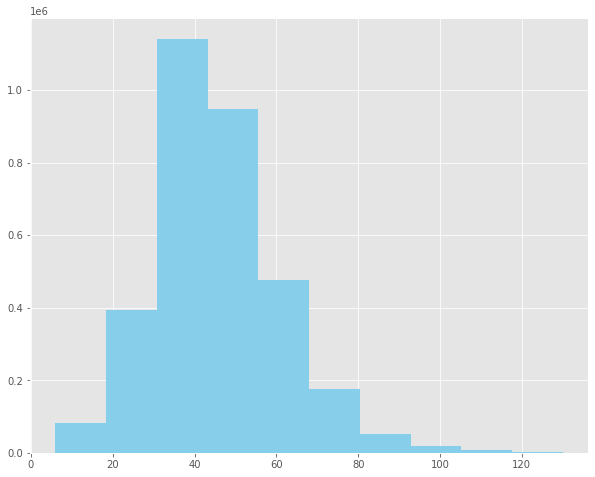

In [ ]:
#Observe the NUMBER OF CHARACTERS present in each sentence giving a rough idea about the news headline length.

df1['headline_text'].str.len().hist(color = "skyblue")
plt.show()

OBSERVATION : 

The histogram shows that news headlines range from 10 to 70 characters and on average it is between 25 to 55 characters

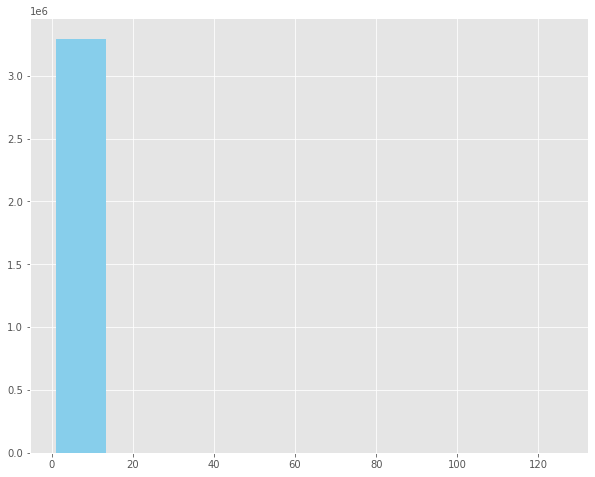

In [ ]:
#Observe the NUMBER OF WORDS present appearing in each news headline

df1['headline_text'].str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist(color = "skyblue")
plt.show()


OBSERVATION : 

1.   The average word length ranges between 1 to 18 with 10 being the most common length.

2.   Analyzing further the amount and the types of stopwords(words that are most commonly used in any language such as “the”,” a”,” an” etc.) can give us some good insights into the data  because these words are probably small in length these words may have caused the above graph to be left-skewed.

3.   To get the corpus containing stopwords you can use the nltk library. Nltk contains stopwords from many languages. Since we are only dealing with English news I will filter the English stopwords from the corpus



In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
corpus=[]
new= df1['headline_text'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

Inspection of words other than stopwords which occur frequently. We will use the counter function from the collections library to count and store the occurrences of each word in a list of tuples. 

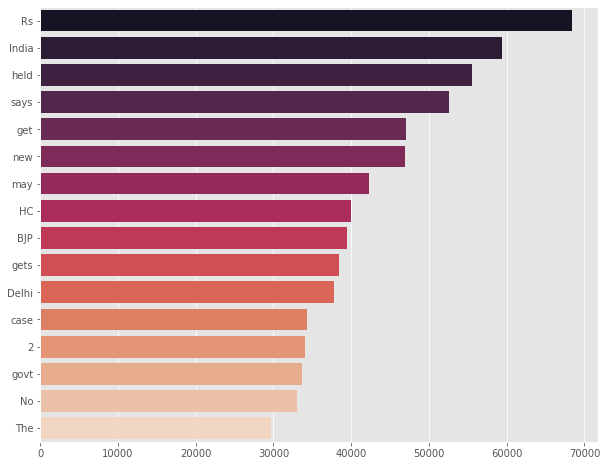

In [ ]:
from collections import Counter

counter = Counter(corpus)
most = counter.most_common()
x, y = [], []
for word, count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)

sns.barplot(x=y,y=x,palette="rocket")
plt.show()

The words “Rs”, “India” and “held” "says" dominate the headlines over the last 15 year but when we observe other words in the graph they are all related to the RS — India.

# ***Ngram exploration***

In [ ]:
from nltk.util import ngrams
list(ngrams(['I' ,'went','to','the','market','and', 'bank'],2))

[('I', 'went'),
 ('went', 'to'),
 ('to', 'the'),
 ('the', 'market'),
 ('market', 'and'),
 ('and', 'bank')]

Ngrams are simply contiguous sequences of n words.If the number of words is two, it is called bigram. For 3 words it is called a trigram and so on. Looking at most frequent n-grams can give you a better understanding of the context in which the word was used.

To build a representation of our vocabulary we will use Countvectorizer to analyze the top bigrams in our news headlines. Countvectorizer is a simple method used to tokenize, vectorize and represent the corpus in an appropriate form available in sklearn.feature_engineering.text .

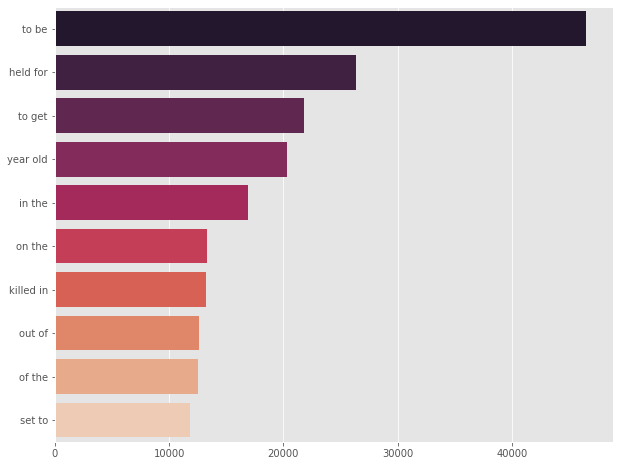

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]
top_n_bigrams=get_top_ngram(df1['headline_text'],2)[:10]
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x,palette="rocket")
plt.show()

# ***Textblob***

Running this on news headlines , TextBlob returns two properties:

1.Polarity: is a floating-point number that lies in the range of [-1,1] where 1 means positive statement and -1 means negative. 

2.Subjectivity: refers to how someone’s judgment is shaped by personal opinions and feelings and is represented as a floating-point value which lies in the range of [0,1].

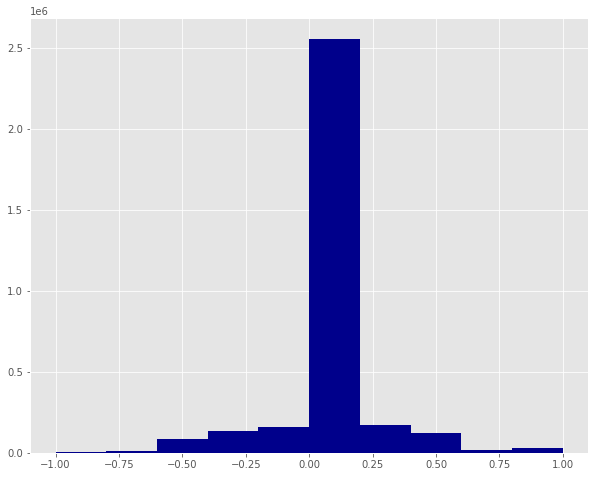

In [ ]:
from textblob import TextBlob
def polarity(text):
    return TextBlob(text).sentiment.polarity
df1['polarity_score']=df1['headline_text'].\
   apply(lambda x : polarity(x))
df1['polarity_score'].hist(color="darkblue")
plt.show()

OBSERVATION : 


1.   Polarity mainly ranges between 0.00 and 0.20 , indicating that the majority of the news headlines are neutral.

From this we will classify the news as negative, positive and neutral based on the scores



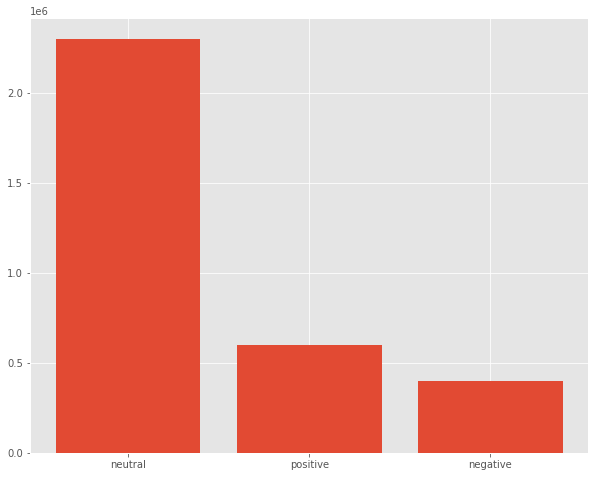

In [ ]:
def sentiment(x):
    if x<0:
        return 'negative'
    elif x==0:
        return 'neutral'
    else:
        return 'positive'
    
df1['polarity']=df1['polarity_score'].\
   map(lambda x: sentiment(x))
plt.bar(df1.polarity.value_counts().index,
        df1.polarity.value_counts())
plt.show()

 OBSERVATION : 
 
 70 % of news is neutral with only 18% of positive and 11% of negative.

In [ ]:
df1[df1['polarity']=='positive']['headline_text'].head()

0     win over cena satisfying but defeating underta...
5                  Extra buses to clear tourist traffic
13          Will Qureshi's return really help the govt?
31                 Extra buses to clear tourist traffic
39          Will Qureshi's return really help the govt?
Name: headline_text, dtype: object

In [ ]:
df1[df1['polarity']=='negative']['headline_text'].head()

66         Destroying myths and doubts on sexuality
87         Powerless north India gropes in the dark
105                        10-year-old girl missing
132              Net lottery: A winner or a sucker?
143    Mental illness can pass from parent to child
Name: headline_text, dtype: object